In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
q = 1.6e-19  
epsilon_0 = 8.85e-12  
hbar = 1.05e-34 

In [3]:
A = 1e-6
B_constant = q**3 / (16 * np.pi**2 * epsilon_0 * hbar)

In [4]:
phi_values = {
    "Pure-Al": 4.2,
    "AlGr0.5": 3.9,
    "AlGr1": 3.6,
    "AlGr1.5": 3.4,
}

In [5]:
E_values = np.linspace(0.5, 10, 500)

In [6]:
def compute_J(E, phi):
    B = B_constant * phi**1.5  
    return A * E**2 * np.exp(-B / E)

In [7]:
def compute_ln_J_E2(E, phi):
    J = compute_J(E, phi)
    return np.log(J / E**2)

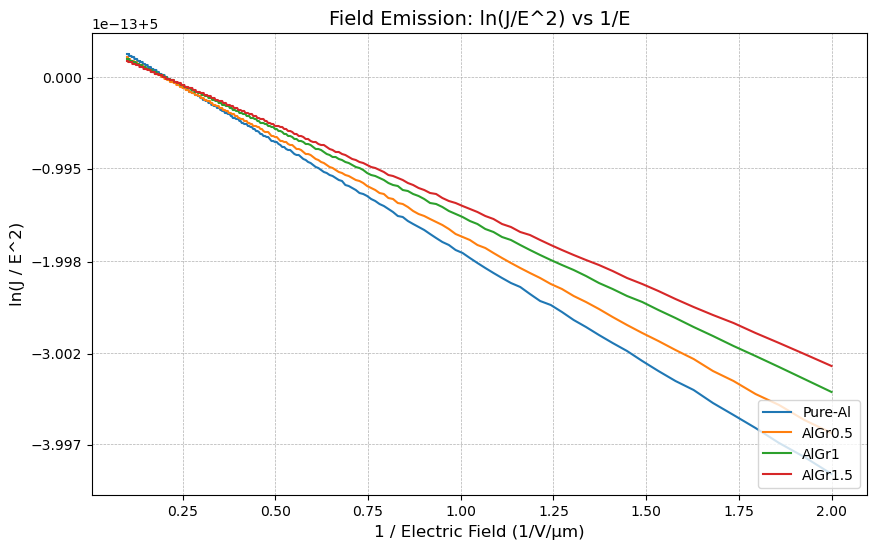

In [9]:
plt.figure(figsize=(10, 6))
for material, phi in phi_values.items():
    ln_J_E2 = compute_ln_J_E2(E_values, phi)
    shift = ln_J_E2[np.argmin(np.abs(1/E_values - 0.2))] - 5
    plt.plot(1/E_values, ln_J_E2 - shift, label=material)

plt.xlabel("1 / Electric Field (1/V/µm)", fontsize=12)
plt.ylabel("ln(J / E^2)", fontsize=12)  # y-axis in ln(J / E^2)
plt.title("Field Emission: ln(J/E^2) vs 1/E", fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)


# Display the plot
plt.show()